# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:<br>

* Which variables are significant in predicting the demand for shared bikes.<br>
* How well those variables describe the bike demands<br>

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



# Step 1: Reading and Understanding the Data

1. Importing data using the pandas library
2. Understanding the structure of the data

In [215]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [216]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [217]:
# Read the given CSV file, and view some sample records

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Let's inspect the various aspects of our dataframe

In [218]:
#Determining the number of rows and columns
bike.shape

(730, 16)

In [219]:
#summary of all the numeric columns in the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [220]:
#Datatypes for each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Finding :
- Dataset has 730 rows and 16 columns.
- Except one column, all other are either float or integer type.
- One column is date type.
- Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.
- We will analyse and finalize whether to convert them to categorical or treat as integer.

# Step 2: Data Quality Check

### 1- Check for null or missing values

In [221]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [222]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

Finding :
- there is no null or missing values in columns or either rows

### 2-Duplicate Check

In [223]:
bike_copy = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_copy.drop_duplicates(subset=None, inplace=True)

In [224]:
bike_copy.shape

(730, 16)

In [225]:
bike.shape

(730, 16)

Finding :
- the shape are the same for both data sets sfter wr drop all duplicate rows so we can conclude that there are not any duplicate rows

### 3- Data Cleaning

Checking value_counts() for entire dataframe.

In [226]:
#Create a copy of the  dataframe, without the 'instant' column,as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]

In [227]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625

In [228]:
#Rename the columns for better understanding
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [229]:
#Mapping variables season, month, weathersit, weekday

bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Finding:<br>
- There is no unknown values in the entire dataset.

# Step 3 :Removing unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:<br>
1. instant : Its only an index value
2. dteday : This has the date, Since we already have seperate columns for 'year' & 'month'
3. casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [230]:
bike_new=bike[['season', 'Year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'count']]

In [231]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Step 4: Data Preparation

### Creating Dummy variables

We will create DUMMY variables for 4 categorical variables 'month', 'weekday', 'season' & 'weathersit'.<br>
Before creating dummy variables, we will have to convert them into 'category' data types.

In [232]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['month']=bike_new['month'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [233]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   Year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  count       730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [234]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temp                      730 non-null    float64
 4   atemp                     730 non-null    float64
 5   humidity                  730 non-null    float64
 6   windspeed                 730 non-null    float64
 7   count                     730 non-null    int64  
 8   season_spring             730 non-null    uint8  
 9   season_summer             730 non-null    uint8  
 10  season_winter             730 non-null    uint8  
 11  month_Aug                 730 non-null    uint8  
 12  month_Dec                 730 non-null    uint8  
 13  month_Feb                 730 non-null    uint8  
 14  month_Jan 

In [235]:
bike_new.shape

(730, 30)

### Spiliting the data

- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio) 


In [236]:
# Check the shape before spliting
bike_new.shape

(730, 30)

In [237]:
# Check the info before spliting
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temp                      730 non-null    float64
 4   atemp                     730 non-null    float64
 5   humidity                  730 non-null    float64
 6   windspeed                 730 non-null    float64
 7   count                     730 non-null    int64  
 8   season_spring             730 non-null    uint8  
 9   season_summer             730 non-null    uint8  
 10  season_winter             730 non-null    uint8  
 11  month_Aug                 730 non-null    uint8  
 12  month_Dec                 730 non-null    uint8  
 13  month_Feb                 730 non-null    uint8  
 14  month_Jan 

In [238]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [239]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      510 non-null    int64  
 1   holiday                   510 non-null    int64  
 2   workingday                510 non-null    int64  
 3   temp                      510 non-null    float64
 4   atemp                     510 non-null    float64
 5   humidity                  510 non-null    float64
 6   windspeed                 510 non-null    float64
 7   count                     510 non-null    int64  
 8   season_spring             510 non-null    uint8  
 9   season_summer             510 non-null    uint8  
 10  season_winter             510 non-null    uint8  
 11  month_Aug                 510 non-null    uint8  
 12  month_Dec                 510 non-null    uint8  
 13  month_Feb                 510 non-null    uint8  
 14  month_Ja

In [240]:
df_train.shape

(510, 30)

In [241]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      219 non-null    int64  
 1   holiday                   219 non-null    int64  
 2   workingday                219 non-null    int64  
 3   temp                      219 non-null    float64
 4   atemp                     219 non-null    float64
 5   humidity                  219 non-null    float64
 6   windspeed                 219 non-null    float64
 7   count                     219 non-null    int64  
 8   season_spring             219 non-null    uint8  
 9   season_summer             219 non-null    uint8  
 10  season_winter             219 non-null    uint8  
 11  month_Aug                 219 non-null    uint8  
 12  month_Dec                 219 non-null    uint8  
 13  month_Feb                 219 non-null    uint8  
 14  month_Jan

In [242]:
df_test.shape

(219, 30)

# Step 5: Exploratory Data Analysis

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables.

In [243]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      510 non-null    int64  
 1   holiday                   510 non-null    int64  
 2   workingday                510 non-null    int64  
 3   temp                      510 non-null    float64
 4   atemp                     510 non-null    float64
 5   humidity                  510 non-null    float64
 6   windspeed                 510 non-null    float64
 7   count                     510 non-null    int64  
 8   season_spring             510 non-null    uint8  
 9   season_summer             510 non-null    uint8  
 10  season_winter             510 non-null    uint8  
 11  month_Aug                 510 non-null    uint8  
 12  month_Dec                 510 non-null    uint8  
 13  month_Feb                 510 non-null    uint8  
 14  month_Ja

In [244]:
df_train.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'season_spring', 'season_summer', 'season_winter',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_July',
       'month_June', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

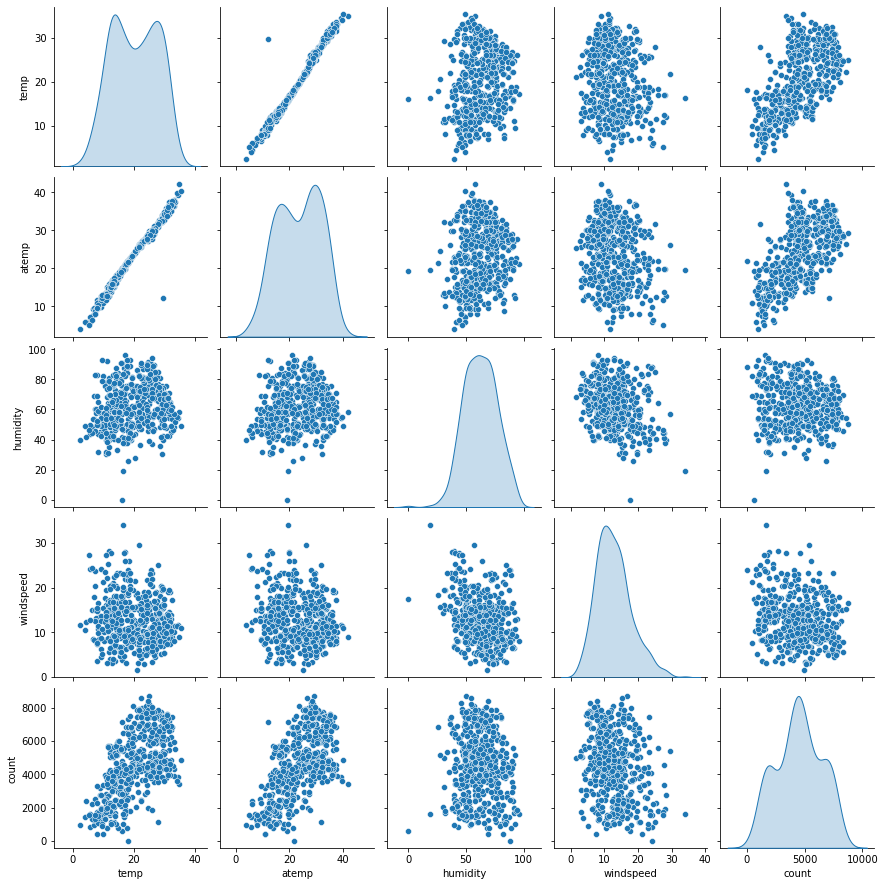

In [245]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'humidity', 'windspeed','count']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

Finding:<br>
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'count'

### Visualising Catagorical Variables

In [246]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      510 non-null    int64  
 1   holiday                   510 non-null    int64  
 2   workingday                510 non-null    int64  
 3   temp                      510 non-null    float64
 4   atemp                     510 non-null    float64
 5   humidity                  510 non-null    float64
 6   windspeed                 510 non-null    float64
 7   count                     510 non-null    int64  
 8   season_spring             510 non-null    uint8  
 9   season_summer             510 non-null    uint8  
 10  season_winter             510 non-null    uint8  
 11  month_Aug                 510 non-null    uint8  
 12  month_Dec                 510 non-null    uint8  
 13  month_Feb                 510 non-null    uint8  
 14  month_Ja

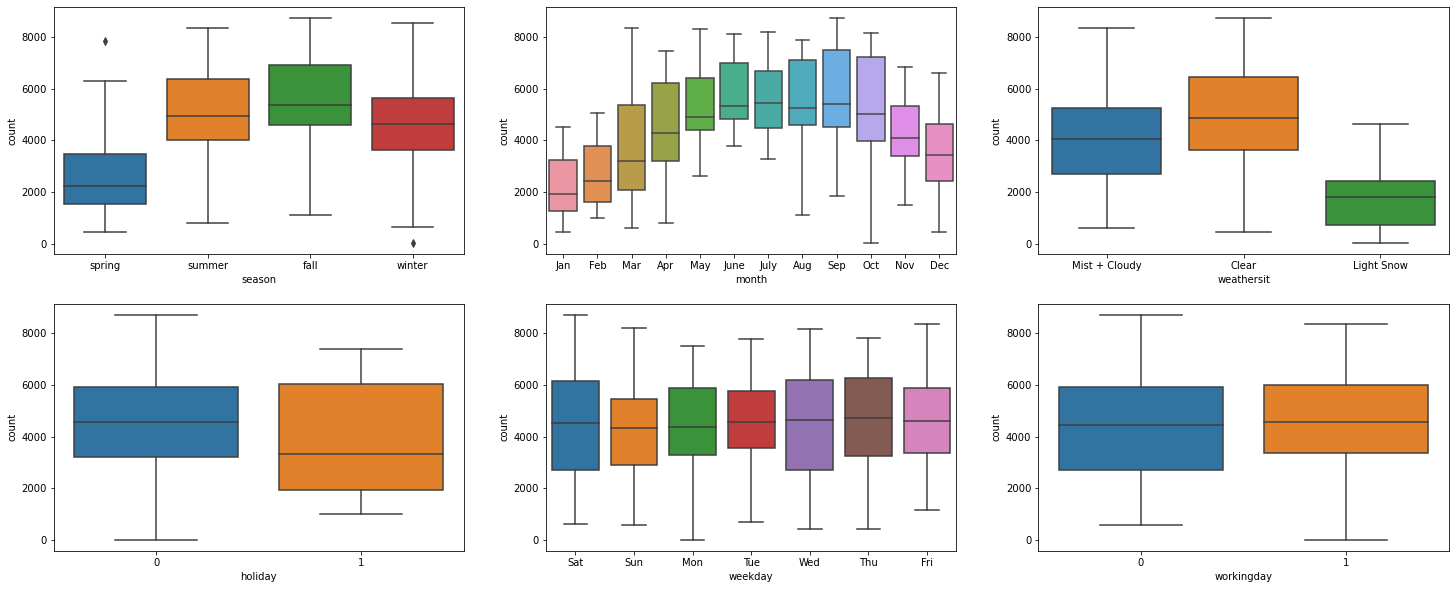

In [247]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'count' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.show()

Finfinng<br>
There were 6 categorical variables in the dataset. We used Box plot (refer the fig above) to study their effect on the dependent variable (‘count’) . The inference that We could derive were: 
- **season**: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

- **mnth**: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. 
- **weathersit**: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
- **holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. 
- **weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
- **workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

### Correlation Matrix

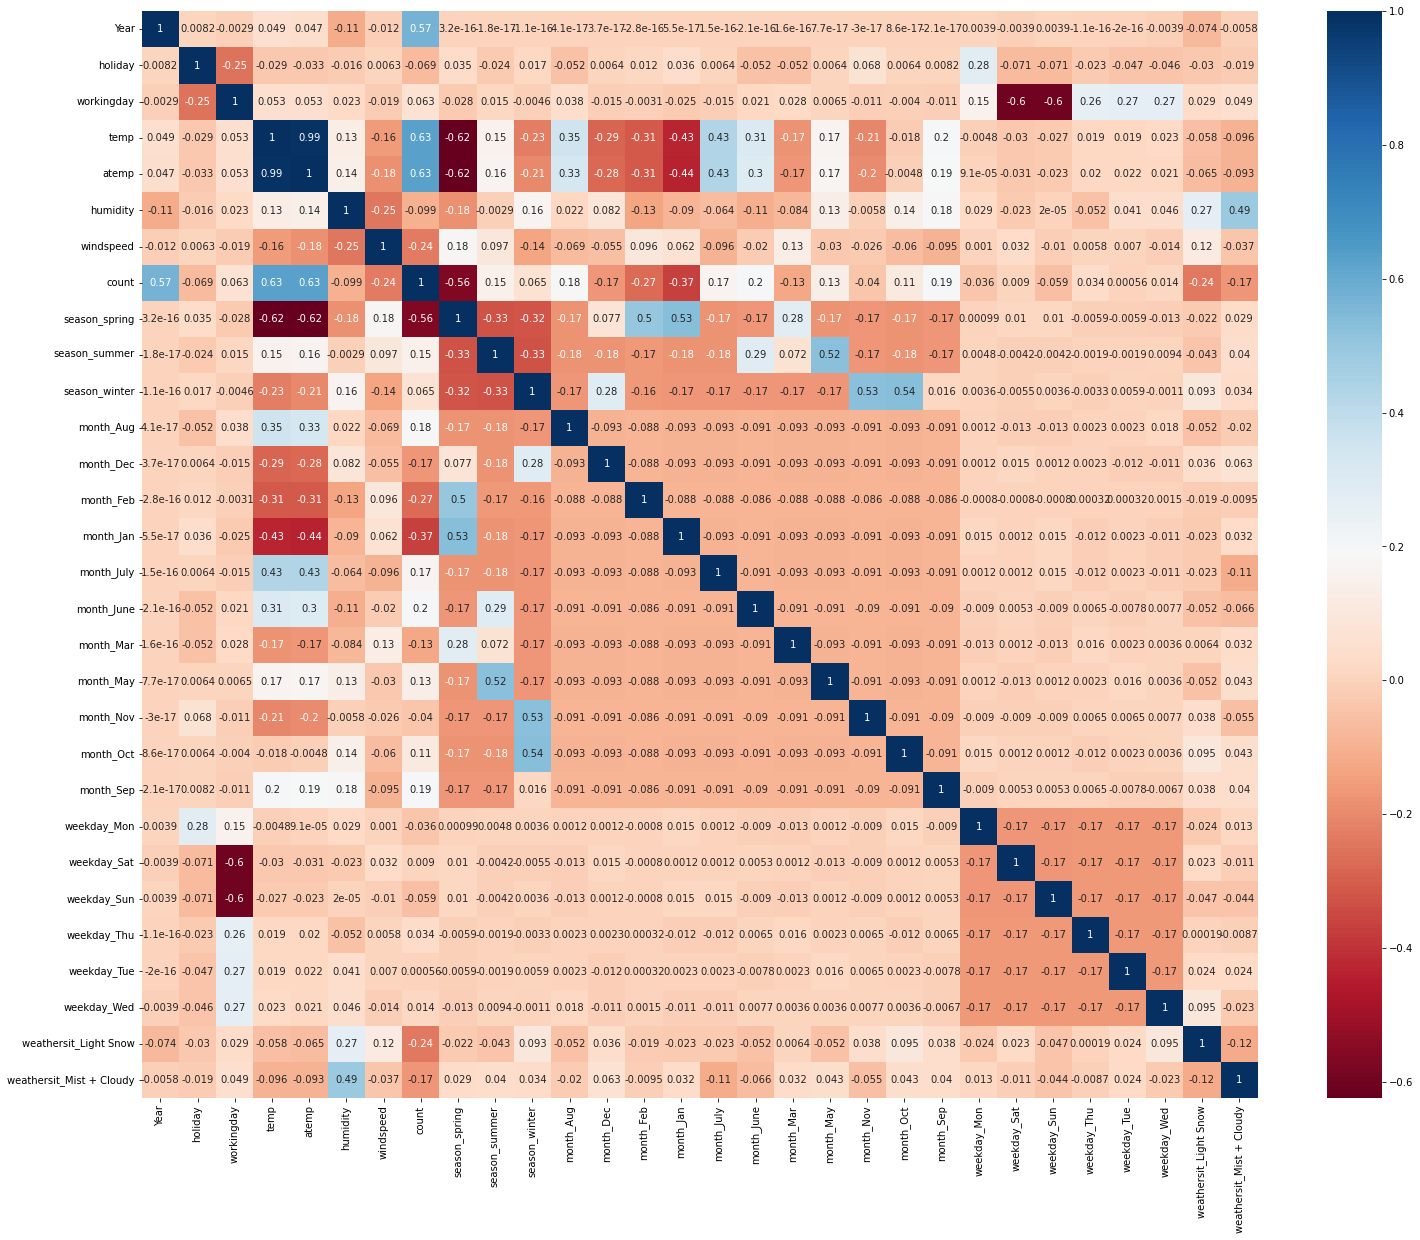

In [248]:
# Let's check the correlation coefficients to see which variables are highly correlated. 
plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

### Rescaling the features

In [249]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [250]:
# Checking the values before scaling
df_train.head()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [251]:
df_train.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'season_spring', 'season_summer', 'season_winter',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_July',
       'month_June', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [252]:
# Apply scaler() to all the numeric variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [253]:
# Checking values after scaling
df_train.head()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [254]:
df_train.describe()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,0.241176,0.098039,0.076471,0.082353,0.084314,0.078431,0.072549,0.078431,0.092157,0.086275,0.084314,0.082353,0.139216,0.150980,0.143137,0.129412,0.141176,0.150980,0.025490,0.341176
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,0.428217,0.297660,0.266010,0.275172,0.278131,0.269113,0.259649,0.269113,0.289531,0.281045,0.278131,0.275172,0.346511,0.358381,0.350557,0.335985,0.348545,0.358381,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 6:Building Linear Regression Model

## Dividing into X and Y sets for the model building

In [255]:
y_train = df_train.pop('count')
X_train = df_train

## RFE

In [256]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [257]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [258]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', False, 8),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('month_Aug', False, 6),
 ('month_Dec', True, 1),
 ('month_Feb', False, 5),
 ('month_Jan', False, 4),
 ('month_July', True, 1),
 ('month_June', False, 13),
 ('month_Mar', True, 1),
 ('month_May', False, 2),
 ('month_Nov', True, 1),
 ('month_Oct', False, 11),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 14),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [259]:
col = X_train.columns[rfe.support_]
col

Index(['Year', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_winter', 'month_Dec', 'month_July', 'month_Mar', 'month_Nov',
       'month_Sep', 'weekday_Sat', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [260]:
X_train.columns[~rfe.support_]

Index(['holiday', 'atemp', 'season_summer', 'month_Aug', 'month_Feb',
       'month_Jan', 'month_June', 'month_May', 'month_Oct', 'weekday_Mon',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [261]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


## Building Linear Model using 'STATS MODEL'

### Model 1

VIF Check

In [262]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,23.20
2,temp,16.56
4,windspeed,5.10
1,workingday,4.80
5,season_spring,2.77
6,season_winter,2.73
14,weathersit_Mist + Cloudy,2.26
0,Year,2.05
10,month_Nov,1.83
12,weekday_Sat,1.83


In [263]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [264]:
# Check the parameters obtained

lr1.params

const                       0.330915
Year                        0.229108
workingday                  0.038902
temp                        0.450511
humidity                   -0.163100
windspeed                  -0.185407
season_spring              -0.126004
season_winter               0.080391
month_Dec                  -0.041700
month_July                 -0.049495
month_Mar                   0.047863
month_Nov                  -0.060646
month_Sep                   0.059716
weekday_Sat                 0.054333
weathersit_Light Snow      -0.268168
weathersit_Mist + Cloudy   -0.049681
dtype: float64

In [265]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          4.19e-186
Time:                        16:44:35   Log-Likelihood:                 508.03
No. Observations:                 510   AIC:                            -984.1
Df Residuals:                     494   BIC:                            -916.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Model 2<br>
-  Even though the VIF of humidity is First highest, it is better to drop 'humidity' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [266]:
X_train_new = X_train_rfe.drop(["humidity"], axis = 1)

In [267]:
print(X_train_new.columns)

Index(['Year', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'month_Dec', 'month_July', 'month_Mar', 'month_Nov',
       'month_Sep', 'weekday_Sat', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')


VIF Check

In [268]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.17
3,windspeed,5.08
1,workingday,4.65
5,season_winter,2.39
4,season_spring,2.11
0,Year,2.04
9,month_Nov,1.81
11,weekday_Sat,1.78
13,weathersit_Mist + Cloudy,1.55
7,month_July,1.39


In [269]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [270]:
# Check the parameters obtained

lr2.params

const                       0.237767
Year                        0.233284
workingday                  0.040800
temp                        0.421940
windspeed                  -0.151428
season_spring              -0.127698
season_winter               0.074839
month_Dec                  -0.050756
month_July                 -0.042334
month_Mar                   0.053570
month_Nov                  -0.060491
month_Sep                   0.054755
weekday_Sat                 0.055458
weathersit_Light Snow      -0.316687
weathersit_Mist + Cloudy   -0.076763
dtype: float64

In [271]:
# Print a summary of the linear regression model obtained
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.98e-183
Time:                        16:44:36   Log-Likelihood:                 498.50
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     495   BIC:                            -903.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2378      0.027      8.875      0.000       0.185       0.290
Year                         0.2333      0.008     28.212      0.000       0.217       0.250
workingday                   0.0408      0.011      3.622      0.000       0.019       0.063
temp                         0.4219      0.032     13.324      0.000       0.360       0.484
windspeed                   -0.1514      0.027     -5.634      0.000      -0.204      -0.099
season_spring               -0.1277      0.016     -8.194      0.000      -0.158      -0.097
season_winter                0.0748      0.014      5.250      0.000       0.047       0.103
month_Dec                   -0.0508      0.017     -2.910      0.004      -0.085      -0.016
month_July                  -0.0423      0.017     -2.440      0.015      -0.076      -0.008
month_Mar                    0.0536      0.016      3.311      0.001       0.022       0.085
month_Nov                   -0.0605      0.019     -3.179      0.002      -0.098      -0.023
month_Sep                    0.0548      0.016      3.483      0.001       0.024       0.086
weekday_Sat                  0.0555      0.015      3.800      0.000       0.027       0.084
weathersit_Light Snow       -0.3167      0.027    -11.913      0.000      -0.369      -0.264
weathersit_Mist + Cloudy    -0.0768      0.009     -8.674      0.000      -0.094      -0.059
==============================================================================
Omnibus:                       78.526   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.929
Skew:                          -0.795   Prob(JB):                     5.72e-42
Kurtosis:                       5.531   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3

Checking VIF

- Remove windspeed based on it's VIF and negative corelation

In [272]:
X_train_new.columns

Index(['Year', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'month_Dec', 'month_July', 'month_Mar', 'month_Nov',
       'month_Sep', 'weekday_Sat', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [273]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

Checking VIF

In [274]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.49
1,workingday,4.58
4,season_winter,2.38
0,Year,2.03
8,month_Nov,1.77
3,season_spring,1.74
10,weekday_Sat,1.74
12,weathersit_Mist + Cloudy,1.54
6,month_July,1.37
5,month_Dec,1.35


In [275]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [276]:
lr3.params

const                       0.171910
Year                        0.230997
workingday                  0.042784
temp                        0.439092
season_spring              -0.128072
season_winter               0.087402
month_Dec                  -0.045288
month_July                 -0.035632
month_Mar                   0.052988
month_Nov                  -0.066409
month_Sep                   0.061242
weekday_Sat                 0.054575
weathersit_Light Snow      -0.332959
weathersit_Mist + Cloudy   -0.074943
dtype: float64

In [277]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          9.71e-178
Time:                        16:44:37   Log-Likelihood:                 482.65
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     496   BIC:                            -878.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Finding**:<br>
This model looks good, as there seems to be very low Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Step 7: Final Model Interpretation

## Hypothesis Testing:

Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

### lr3 model coefficient values

- const                       0.171910
- Year                        0.230997
- workingday                  0.042784
- temp                        0.439092
- season_spring              -0.128072
- season_winter               0.087402
- month_Dec                  -0.045288
- month_July                 -0.035632
- month_Mar                   0.052988
- month_Nov                  -0.066409
- month_Sep                   0.061242
- weekday_Sat                 0.054575
- weathersit_Light Snow      -0.332959
- weathersit_Mist + Cloudy   -0.074943

### Finding:
- From the lr3 model summary, it is evident that all our coefficients are not equal to zero which means **We REJECT the NULL HYPOTHESIS**

### F Statistics:
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic:  179.0
- Prob (F-statistic): 9.71e-178

The F-Statistics value of 179 (which is greater than 1) states that the overall model is significant

The equation of best fitted surface based on model lr3:<br>
cnt = 0.171910 + (yr × 0.230997) + (workingday × 0.042784) + (temp × 0.439092) - (season_spring  × 0.128072) + (season_winter  × 0.087402) - (month_Dec  × 0.045288) - (month_July × 0.035632) + (month_Mar × 0.052988) − (month_Nov × 0.066409) + (month_Sep x 0.061242) + (weekday_Sat x 0.054575) + (weekday_Sat x 0.054575) - (weathersit_Light Snow x 0.332959)- (weathersit_Mist + Cloudy x 0.074943)

### Interpretation of Coefficients:

**temp:** A coefficient value of ‘0.439092’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.439092 units.

**const:** The Constant value of ‘0.171910’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.171910 units.

**year:** A coefficient value of ‘0.230997’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.230997 units.

**workingday:** A coefficient value of ‘0.042784’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.042784 units.

**season_spring:** A coefficient value of ‘-0.128072" indicated that a unit increase in yr variable, decrease the bike hire numbers by 0.128072 units.

**season_winter:** A coefficient value of ‘0.087402" indicated that a unit increase in yr variable, increases the bike hire numbers by 0.087402 units.

**month_Dec:** A coefficient value of ‘-0.045288" indicated that a unit increase in yr variable, decreases the bike hire numbers by 0.045288 units.

**month_July:** A coefficient value of ‘-0.035632" indicated that a unit increase in yr variable, decreases the bike hire numbers by 0.035632 units.

**month_Mar:** A coefficient value of ‘0.052988" indicated that a unit increase in yr variable, increases the bike hire numbers by 0.052988 units.

**month_Nov:** A coefficient value of ‘-0.066409" indicated that a unit increase in yr variable, decreases the bike hire numbers by "0.066409" units.

**month_Sep:** A coefficient value of ‘0.061242" indicated that a unit increase in yr variable, increases the bike hire numbers by 0.061242 units.

**weekday_Sat:** A coefficient value of ‘0.054575" indicated that a unit increase in yr variable, increases the bike hire numbers by 0.054575 units.

# ASSUMPTIONS 

## Error terms are normally distributed with mean zero (not X, Y)
- Residual Analysis Of Training Data

In [278]:
y_train_pred = lr3.predict(X_train_lm3)

Text(0.5, 0, 'Errors')

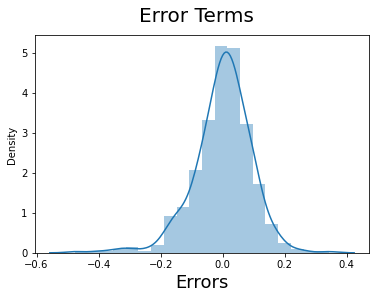

In [279]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Finding**:<br>
From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## There is a linear relationship between X and Y

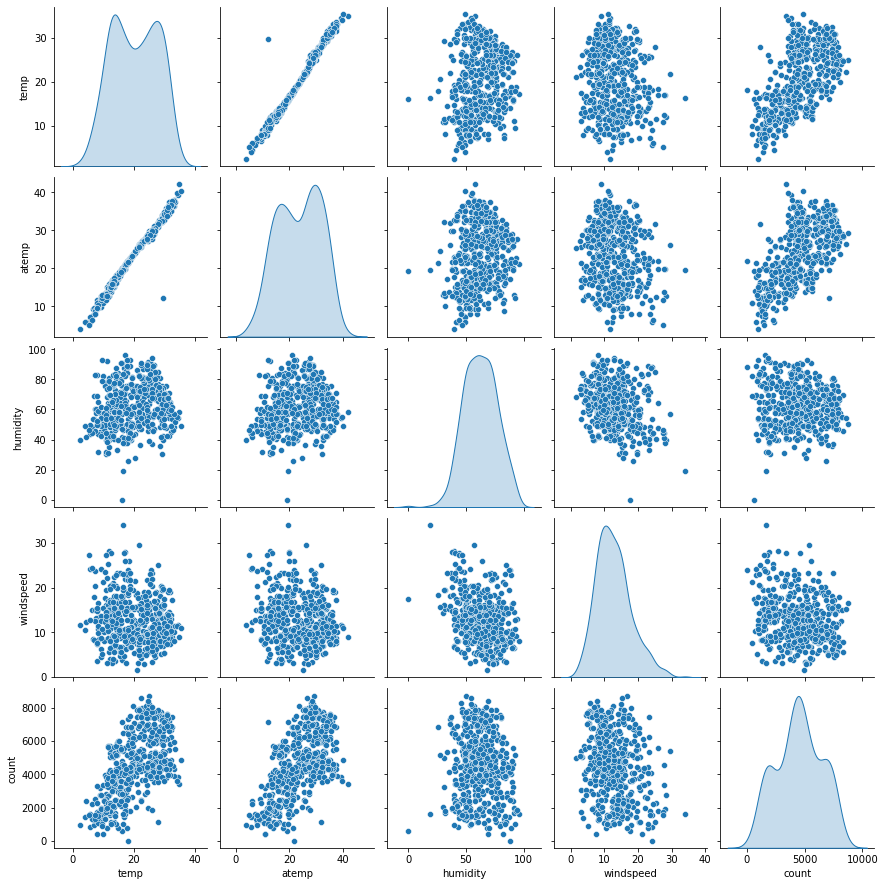

In [280]:
bike_new=bike_new[[ 'temp', 'atemp', 'humidity', 'windspeed','count']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

**Finding**:<br>
Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

## There is No Multicollinearity between the predictor variables

In [281]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.49
1,workingday,4.58
4,season_winter,2.38
0,Year,2.03
8,month_Nov,1.77
3,season_spring,1.74
10,weekday_Sat,1.74
12,weathersit_Mist + Cloudy,1.54
6,month_July,1.37
5,month_Dec,1.35


**Finding**:<br>
From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# Step 8: Making predication using final Model 

### Applying the scaling on the test sets

In [282]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = [ 'temp', 'atemp', 'humidity', 'windspeed','count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [283]:
df_test.head

<bound method NDFrame.head of      Year  holiday  workingday      temp     atemp  humidity  windspeed  \
22      0        0           0  0.046591  0.025950  0.453529   0.462217   
468     1        0           0  0.543115  0.536771  0.522511   0.347424   
553     1        0           0  0.951196  0.933712  0.596104   0.212829   
504     1        0           0  0.699909  0.662746  0.551083   0.478229   
353     0        0           1  0.407087  0.416610  0.618615   0.080770   
..    ...      ...         ...       ...       ...       ...        ...   
237     0        0           1  0.798555  0.762199  0.790909   0.126931   
611     1        0           1  0.830744  0.797844  0.784416   0.441027   
258     0        0           1  0.510926  0.501959  0.613420   0.292310   
518     1        0           0  0.677065  0.651150  0.512554   0.333343   
313     0        0           1  0.399819  0.386770  0.845021   0.343610   

        count  season_spring  season_summer  season_winter  month_Aug

In [284]:
df_test.describe()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.237443,0.264840,0.251142,0.054795,0.105023,0.059361,0.086758,0.100457,0.105023,0.100457,0.068493,0.073059,0.086758,0.082192,0.155251,0.127854,0.146119,0.173516,0.146119,0.118721,0.036530,0.324201
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.426491,0.442259,0.434663,0.228100,0.307285,0.236840,0.282125,0.301297,0.307285,0.301297,0.253169,0.260830,0.282125,0.275286,0.362974,0.334692,0.354034,0.379560,0.354034,0.324202,0.188034,0.469148
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [285]:
y_test = df_test.pop('count')
X_test = df_test
X_test.info()


#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm3 = sm.add_constant(X_test)
X_test_lm3.info()

# Making predictions using the final model (lr3)

y_pred = lr3.predict(X_train_lm3)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      219 non-null    int64  
 1   holiday                   219 non-null    int64  
 2   workingday                219 non-null    int64  
 3   temp                      219 non-null    float64
 4   atemp                     219 non-null    float64
 5   humidity                  219 non-null    float64
 6   windspeed                 219 non-null    float64
 7   season_spring             219 non-null    uint8  
 8   season_summer             219 non-null    uint8  
 9   season_winter             219 non-null    uint8  
 10  month_Aug                 219 non-null    uint8  
 11  month_Dec                 219 non-null    uint8  
 12  month_Feb                 219 non-null    uint8  
 13  month_Jan                 219 non-null    uint8  
 14  month_Jul

# Step 9:Model Evaluation

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

 ### R^2 Value for TEST

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)